In [486]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from pandas.api.types import is_string_dtype, is_numeric_dtype


In [487]:
# import dataSets
train=pd.read_csv('Resource/train.csv')

test=pd.read_csv('Resource/test.csv')

gender=pd.read_csv('Resource/gender_submission.csv')

test=pd.merge(test , gender,how='left', on='PassengerId')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [488]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [489]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [490]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [491]:
# check test dataSet
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [492]:
# check Survived per Pclass

train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

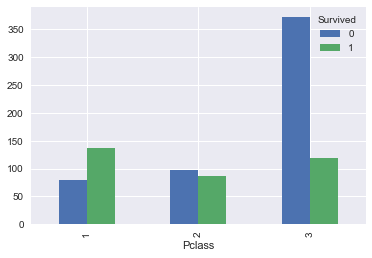

In [493]:

train.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar')

### most survival are on class 1 and class 3 has more death rate

lets check the survial rate on each class 

In [494]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


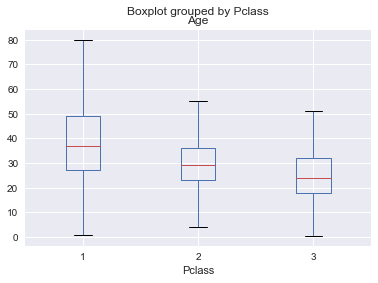

In [495]:
# boxplot to see age 
train.boxplot(column='Age' , by='Pclass',showfliers=True)

## Seaborn boxplot gives us better visualization

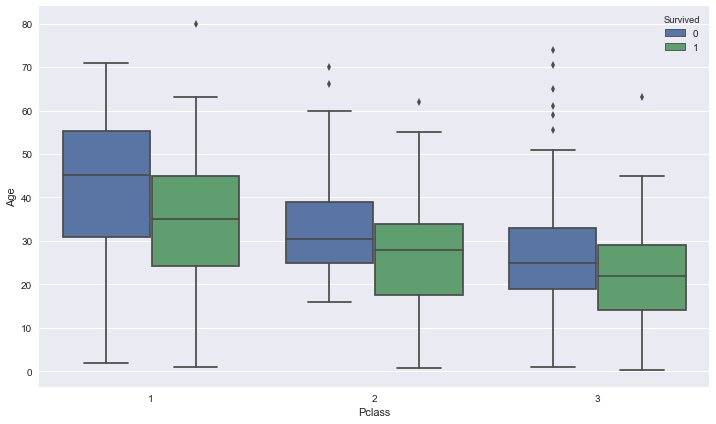

In [496]:
# using Seaborn boxplot
plt.figure(figsize=(12,7))
sns.boxplot(train.Pclass,train.Age, hue=train.Survived)

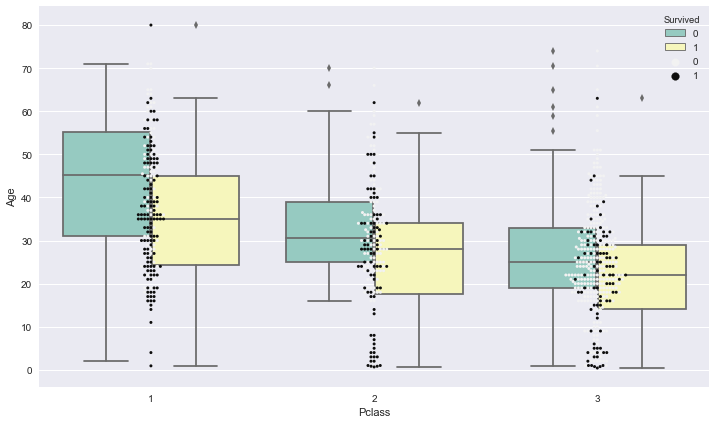

In [497]:
# to see records in more detail
plt.figure(figsize=(12,7))
ax = sns.boxplot(x="Pclass", y="Age", hue="Survived",data=train, palette="Set3")
ax = sns.swarmplot(x="Pclass", y="Age", hue="Survived",data=train, size=3,color=".05")

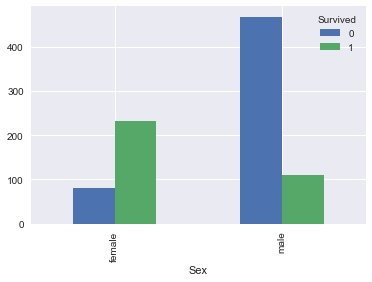

In [498]:
train.groupby('Sex')['Survived'].value_counts().unstack().plot(kind='bar')


In [499]:
train.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


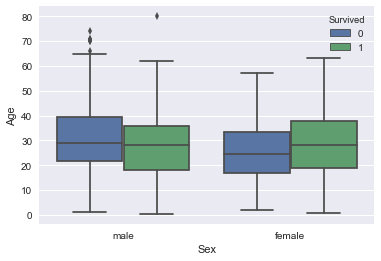

In [500]:
sns.boxplot(train.Sex, train.Age, hue=train.Survived)

In [501]:
train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [502]:
from ipywidgets import interact

# only columns with numeric value
num_train=train.select_dtypes(include=['int64', 'float64'])

def plotter(col):
    plt.figure(figsize=(12,8))
    sns.distplot(num_train[f'{col}'] ,color='darkred' )



interact(plotter, col=[i for i in num_train.columns])

interactive(children=(Dropdown(description='col', options=('PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp'…

<function __main__.plotter(col)>

In [503]:


from ipywidgets import interact

# only columns with numeric value
num_train=train.select_dtypes(include=['int64', 'float64'])

def Pariplotter(xcol,ycol):
    plt.figure(figsize=(12,8))
    sns.pairplot(data=num_train , x_vars=[f'{xcol}'], y_vars=[f'{ycol}'] , hue='Survived', kind='reg' ,size=9)



interact(Pariplotter, xcol=[i for i in num_train.columns], ycol=[i for i in num_train.columns])



interactive(children=(Dropdown(description='xcol', options=('PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp…

<function __main__.Pariplotter(xcol, ycol)>

# younger men and older women survived

Text(0.5, 1.0, 'Distribution of Age in each Class')

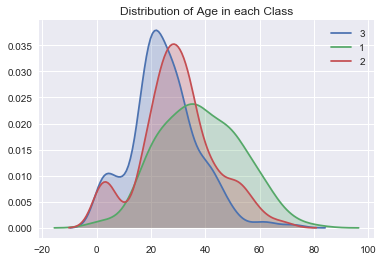

In [504]:
# see distribution 
for i in train.Pclass.unique():
    sns.kdeplot(train[train.Pclass==i]['Age'], shade=True,label=i)
    
plt.title('Distribution of Age in each Class')

In [505]:
from ipywidgets import interact


def ploter(i):
    train[train['Pclass']==i].groupby('Sex').Survived.value_counts().unstack().plot(kind='bar')
    
i=[1,2,3]
    
interact(ploter, i=[1,2,3])





interactive(children=(Dropdown(description='i', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…

<function __main__.ploter(i)>

In [506]:
train.shape , test.shape

((891, 12), (418, 12))

In [507]:
# find the null Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [508]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

Text(0.5, 1.0, 'Null Value on each column')

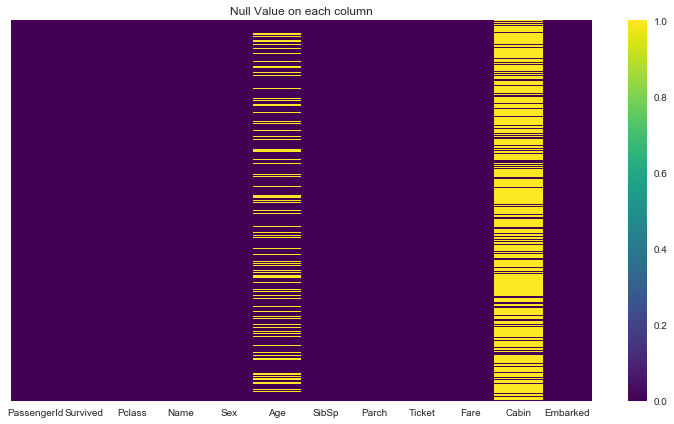

In [509]:
# visualized null data in each column
plt.figure(figsize=(13,7))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.title('Null Value on each column')

In [510]:
# fill Null / NaN on Age column with mean age
train.fillna(value=train.Age.mean(), inplace =True)
test.fillna(value=test.Age.mean(), inplace=True)

In [511]:
# We can't replace Nan with Mean , this time we need to find the mode on Embarked column

# 2 methds

train['Embarked'].value_counts()
print ('the most Port of Embarkation',train['Embarked'].mode())

the most Port of Embarkation 0    S
dtype: object


In [512]:
# so we replace Port of Embarkation with S
train.Embarked.fillna(value=train['Embarked'].mode(),inplace=True)
test.Embarked.fillna(value=test['Embarked'].mode(),inplace=True)

In [513]:
train.shape , test.shape

((891, 12), (418, 12))

In [514]:
print (train.isnull().sum().sum(),test.isnull().sum().sum())  # to check na 
train.dtypes.value_counts()

0 0


object     5
int64      5
float64    2
dtype: int64

In [515]:
# we dont need Name , cabin ,Fare and Ticket
y_train=train.Survived
y_test=test.Survived
train.drop(['Name','Cabin','Ticket','Fare','Survived'], axis=1, inplace=True)
test.drop(['Name','Cabin','Ticket','Fare','Survived'], axis=1, inplace=True)

train.shape , test.shape

((891, 7), (418, 7))

In [516]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S


## we can use the below 2 boxes but cat.codes is not good for this issue

In [518]:
# encod cat columns
train.select_dtypes(include=['object']).head(2)


,Sex,Embarked
0,male,S
1,female,C


In [519]:
# encode sex amd embark

Train=pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True)
Test=pd.get_dummies(test, columns=['Sex','Embarked'], drop_first=True)

Test.shape , Train.shape

((418, 8), (891, 9))

In [520]:
Train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,1,0,0,1
1,2,1,38.0,1,0,0,1,0,0
2,3,3,26.0,0,0,0,0,0,1
3,4,1,35.0,1,0,0,0,0,1
4,5,3,35.0,0,0,1,0,0,1


In [521]:
Test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,1,1,0
1,893,3,47.0,1,0,0,0,1
2,894,2,62.0,0,0,1,1,0
3,895,3,27.0,0,0,1,0,1
4,896,3,22.0,1,1,0,0,1


In [522]:
# to have the same colum for both test and train

# use align
commo_col=[i for i in Train.columns if i in Test.columns]
commo_col

['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [523]:
# test and train have different shape to make it work use this approach


all_data=pd.concat((train,test))

all_data.dtypes.value_counts()

int64      4
object     2
float64    1
dtype: int64

In [524]:

all_data=pd.concat((train,test))

for column in all_data.select_dtypes(include=['object']):
    train[column]=train[column].astype('category', categories = all_data[column].unique())
    test[column]=test[column].astype('category', categories = all_data[column].unique())

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [525]:
Train=pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True)
Test=pd.get_dummies(test, columns=['Sex','Embarked'], drop_first=True)

Test.shape , Train.shape

((418, 9), (891, 9))

In [526]:
Test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_29.69911764705882
0,892,3,34.5,0,0,0,0,1,0
1,893,3,47.0,1,0,1,0,0,0
2,894,2,62.0,0,0,0,0,1,0
3,895,3,27.0,0,0,0,0,0,0
4,896,3,22.0,1,1,1,0,0,0


In [527]:
Train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_29.69911764705882
0,1,3,22.0,1,0,0,0,0,0
1,2,1,38.0,1,0,1,1,0,0
2,3,3,26.0,0,0,1,0,0,0
3,4,1,35.0,1,0,1,0,0,0
4,5,3,35.0,0,0,0,0,0,0


In [528]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [529]:
x=Train.iloc[:,1:8]

m=sm.OLS(endog=y_train, exog=x).fit()

print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          4.15e-154
Time:                        10:26:10   Log-Likelihood:                -469.02
No. Observations:                 891   AIC:                             952.0
Df Residuals:                     884   BIC:                             985.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0045      0.011     -0.423      0.6

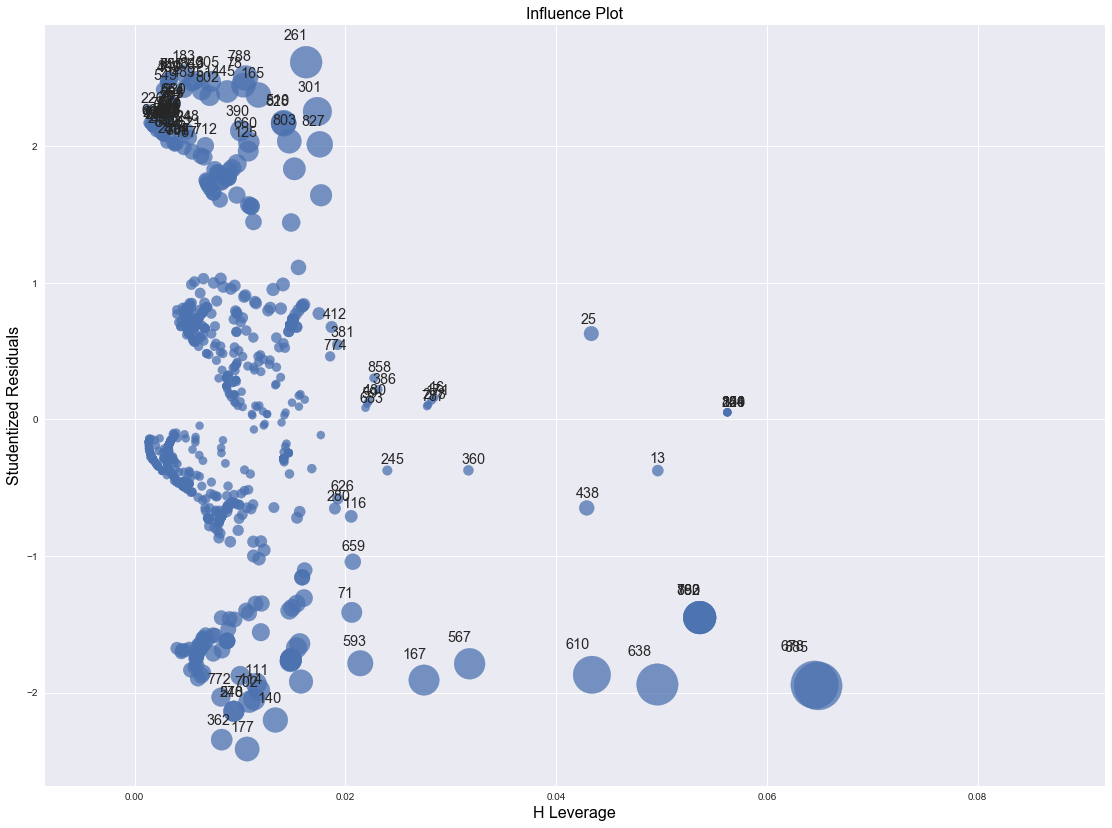

In [530]:
# Construc leverage plot to identify high leverage points and outliers
fig, ax = plt.subplots(figsize=(19,14))
fig=sm.graphics.influence_plot(m, ax=ax)

In [531]:
Train.drop([635,610,301,567,685,593], axis=0, inplace=True)
y_train.drop([635,610,301,567,685,593], axis=0, inplace=True)

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          1.73e-155
Time:                        10:26:43   Log-Likelihood:                -460.54
No. Observations:                 885   AIC:                             935.1
Df Residuals:                     878   BIC:                             968.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0047      0.011     -0.444      0.6

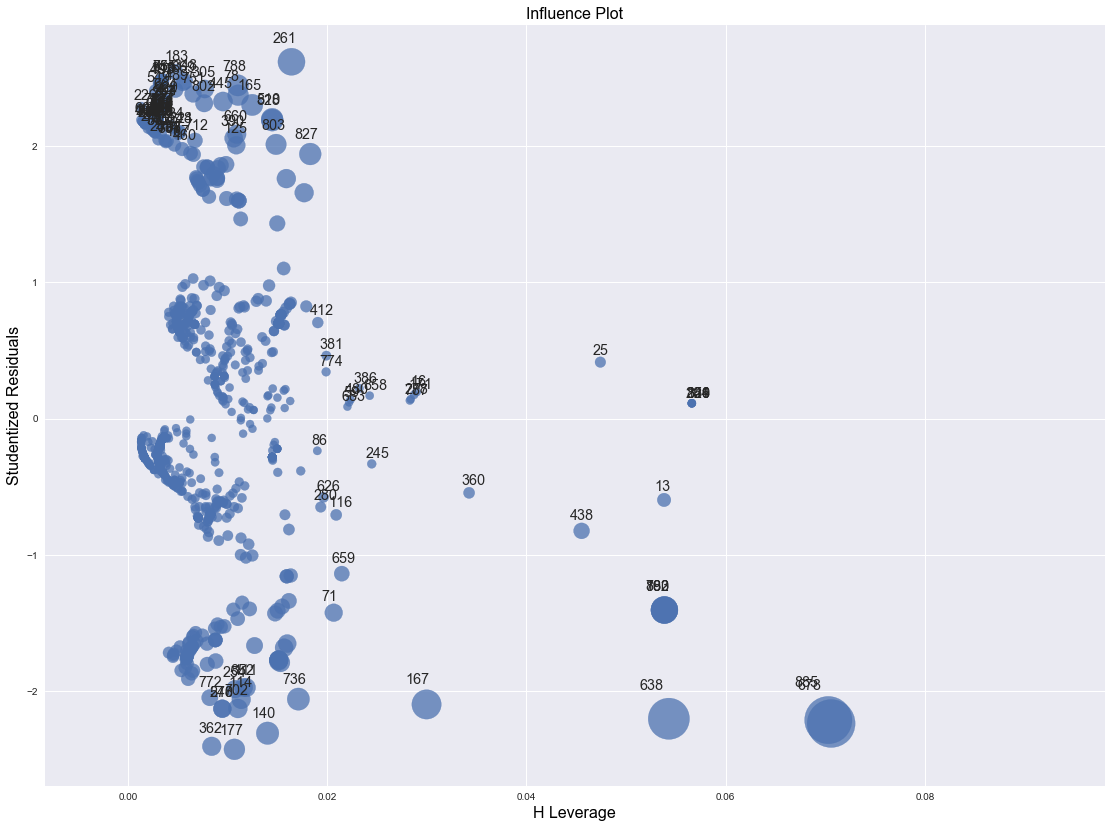

In [532]:

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

x=Train.iloc[:,1:8]

m=sm.OLS(endog=y_train, exog=x).fit()

print(m.summary())

fig, ax = plt.subplots(figsize=(19,14))
fig=sm.graphics.influence_plot(m, ax=ax)

In [533]:
# remove more outlier

Train.drop([638,167,885], axis=0, inplace=True)
y_train.drop([638,167,885], axis=0, inplace=True)

In [534]:
Train.drop("PassengerId", axis=1, inplace=True)
Test.drop("PassengerId", axis=1, inplace=True)

In [535]:
Train.shape , Test.shape

((882, 8), (418, 8))

In [536]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=50, min_samples_leaf=3,max_features=0.5, n_jobs=-1)
RF.fit(Train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [537]:
RF.score(Train, y_train)

0.8764172335600907

In [538]:
RF.score(Test, y_test)

0.8636363636363636

In [305]:

Prediction=RF.predict(Test)


In [306]:
answer=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':Prediction})

In [307]:
answer.to_csv('Submission.csv', index=False)

In [308]:
RF.feature_importances_

array([0.16554393, 0.25365248, 0.06279136, 0.03449438, 0.4414695 ,
       0.02541447, 0.01663389, 0.        ])

In [270]:
list(zip(Test.columns, RF.feature_importances_))

[('PassengerId', 0.1768948712719961),
 ('Pclass', 0.14651501400847167),
 ('Age', 0.17188982668719313),
 ('SibSp', 0.04536214453271243),
 ('Parch', 0.031146658423854577),
 ('Sex_female', 0.3892507524583743),
 ('Embarked_C', 0.023744898886378173),
 ('Embarked_Q', 0.015195833731019617),
 ('Embarked_29.69911764705882', 0.0)]

In [548]:


from sklearn.model_selection import GridSearchCV

parameters= [{'n_estimators':[10,20,30,40,50,80, 100], 'min_samples_leaf':[1,2,3,4],  # all inside one dict
             'max_features':[0.5,1,2], 'criterion':['gini','entropy']}]
            
            
grid_search = GridSearchCV( RF , param_grid = parameters , scoring ='accuracy' ,cv=10) 

In [549]:
grid_search=grid_search.fit (Train, y_train)

In [551]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [552]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 1,
 'min_samples_leaf': 4,
 'n_estimators': 50}

In [557]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=50, min_samples_split=2,min_samples_leaf=4,
                          max_features=0.5,criterion='entropy', n_jobs=-1)
RF.fit(Train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [558]:
RF.score(Train, y_train)

0.8639455782312925

In [559]:
RF.score(Test, y_test)

0.9186602870813397

In [560]:
Prediction=RF.predict(Test)
answer=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':Prediction})
answer.to_csv('Submission.csv', index=False)

In [561]:
# lets scale train and test then submit

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

Train=scalar.fit_transform(Train)
Test=scalar.transform(Test)


In [562]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=50, min_samples_split=2,min_samples_leaf=4,
                          max_features=0.5,criterion='entropy', n_jobs=-1)
RF.fit(Train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [563]:
RF.score(Train, y_train)

0.8616780045351474

In [564]:
RF.score(Test, y_test)

0.8755980861244019


# instead of cat.code let encode them using get dummies

In [283]:
train.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C


In [284]:
train=pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_29.69911764705882
0,1,3,22.0,1,0,0,0,0,0
1,2,1,38.0,1,0,1,1,0,0
2,3,3,26.0,0,0,1,0,0,0
3,4,1,35.0,1,0,1,0,0,0
4,5,3,35.0,0,0,0,0,0,0


In [285]:
test=pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_29.69911764705882
0,892,3,34.5,0,0,0,0,1,0
1,893,3,47.0,1,0,1,0,0,0
2,894,2,62.0,0,0,0,0,1,0
3,895,3,27.0,0,0,0,0,0,0
4,896,3,22.0,1,1,1,0,0,0


In [286]:
Train=train.drop(['PassengerId','Ticket','Survived','Name','Fare','Embarked_C'], axis=1)
Test=test.drop(['PassengerId','Ticket','Survived','Name','Fare'], axis=1)

KeyError: "['Ticket' 'Survived' 'Name' 'Fare'] not found in axis"

In [116]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=20, min_samples_split=2,min_samples_leaf=4,max_features=2,criterion='entropy', n_jobs=-1)
RF.fit(Train, train.Survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [117]:
RF.score(Train, train.Survived)

0.8529741863075196

In [118]:
RF.score(Test, test.Survived)

0.8947368421052632

In [119]:
from sklearn.model_selection import GridSearchCV

parameters= [{'n_estimators':[30,40,50,80, 100], 'min_samples_leaf':[1,2,3,4],  # all inside one dict
             'max_features':[0.5,1,2], 'criterion':['gini','entropy']}]
            
            
grid_search = GridSearchCV( RF , param_grid = parameters , scoring ='accuracy' ,cv=10) 

grid_search=grid_search.fit (Train, train.Survived)

In [152]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [153]:
RF=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RF.fit(Train, train.Survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [154]:
RF.score(Train, train.Survived)

0.8552188552188552

In [158]:
from sklearn.metrics import confusion_matrix

con=confusion_matrix(train.Survived,RF.predict(Train))

print (con)

[[512  37]
 [ 92 250]]


In [155]:
RF.score(Test, test.Survived)

0.9138755980861244

In [156]:
from sklearn.metrics import confusion_matrix

con=confusion_matrix(test.Survived,RF.predict(Test))

print (con)

[[254  12]
 [ 24 128]]
